# Diplomdo en IA y AP
## Universidad Nacional de Colombia
## Juan Pablo Mojica Macías
## **Regresión y Clasificación**

## 1. Breast Cancer Winsconsin
Construya una red neuronal de clasificación binaria para predecir el cáncer de seno. Use los datos Breast Cancer Wisconsin.

In [82]:
#Importamos Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from tensorflow.estimator import LinearClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Activation, Dropout

In [83]:
datos=pd.read_csv('/home/juanpablo/Documentos/Trabajos Diplomado/Talleres Diplomados/Regresión y clasificación/data.csv')
del datos['Unnamed: 32']
datos.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Preprocesamiento de los datos

In [84]:
# extrae como tensores numpy
x = datos.iloc[:,2:].values #Covariables
y = datos.iloc[:,1].values #Variable Objetivo

### Recodificación de la Variable Objetivo

In [85]:
diagnostico = LabelEncoder()
y = diagnostico.fit_transform(y)

### Datos para Train y Test

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)
print(x_test.shape)

(57, 30)


### Estandarización de los Datos

In [87]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Genaración de un Modelo Squential Modo 2

In [88]:
clasificador = Sequential()
clasificador.add(Dense(units=16, activation='relu', input_shape=(30,)))
clasificador.add(Dropout(0.1)) # 10% out in each epoc
clasificador.add(Dense(units=16, activation='relu'))
clasificador.add(Dropout(0.1))
clasificador.add(Dense(units=1, activation='sigmoid'))

### Proceso de Compilación

In [89]:
clasificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [90]:
clasificador.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                496       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento

In [91]:
history = clasificador.fit(x_train, y_train, batch_size=32, epochs=150,validation_split = 0.2)

Epoch 1/150
13/13 [==============================] - 0s 29ms/step - loss: 0.8620 - accuracy: 0.4548 - val_loss: 0.7398 - val_accuracy: 0.5728
Epoch 2/150
13/13 [==============================] - 0s 15ms/step - loss: 0.6373 - accuracy: 0.6699 - val_loss: 0.5323 - val_accuracy: 0.7573
Epoch 3/150
13/13 [==============================] - 0s 12ms/step - loss: 0.4985 - accuracy: 0.7995 - val_loss: 0.3835 - val_accuracy: 0.8835
Epoch 4/150
13/13 [==============================] - 0s 12ms/step - loss: 0.3687 - accuracy: 0.8753 - val_loss: 0.2879 - val_accuracy: 0.9417
Epoch 5/150
13/13 [==============================] - 0s 11ms/step - loss: 0.3105 - accuracy: 0.8949 - val_loss: 0.2196 - val_accuracy: 0.9903
Epoch 6/150
13/13 [==============================] - 0s 14ms/step - loss: 0.2576 - accuracy: 0.9291 - val_loss: 0.1757 - val_accuracy: 0.9903
Epoch 7/150
13/13 [==============================] - 0s 13ms/step - loss: 0.2285 - accuracy: 0.9364 - val_loss: 0.1448 - val_accuracy: 0.9903
Epoch 

### Predicciones

In [92]:
y_pred = clasificador.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

### Matriz de Confusión

In [93]:
cm = confusion_matrix(y_test, y_pred)

In [94]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Our accuracy is 98.24561403508771%


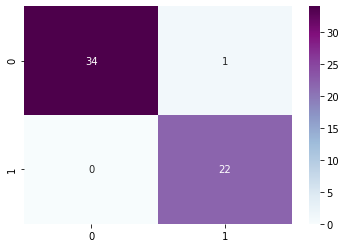

In [95]:
sb.heatmap(cm,annot=True,cmap="BuPu")
plt.savefig('h.png')

### Evaluación del Modelo 

In [96]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

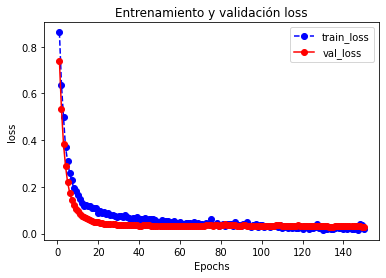

In [97]:
plot_metric(history, 'loss')

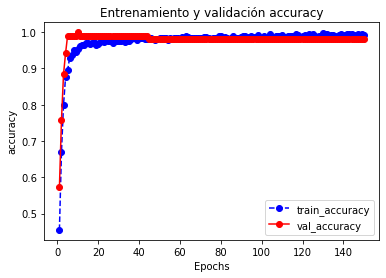

In [98]:
plot_metric(history, 'accuracy')

## 2. Boston Housing

Construya una red neuronal de regresión poara predecir el precio de las viviendas. Use los datos Boston Housing.

In [99]:
from sklearn.datasets import load_boston
data = load_boston()

In [100]:
boston = pd.DataFrame(data.data, columns = data.feature_names)
boston["target"] = data.target
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Preprocesamiento de los datos

In [101]:
boston.isna().sum()
dataset = boston.dropna()

### Entrenamiemto y Test

In [102]:
train_boston = boston.sample(frac=0.8,random_state=0)
test_boston = boston.drop(train_boston.index)

In [103]:
train_descrip = train_boston.describe()
train_descrip.pop("target")
train_descrip = train_descrip.transpose()
train_descrip

,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,3.670339,8.977954,0.00632,0.08265,0.26838,3.47428,88.9762
ZN,405.0,11.067901,22.688396,0.00000,0.00000,0.00000,12.50000,95.0000
INDUS,405.0,11.097951,6.699157,0.74000,5.32000,9.69000,18.10000,27.7400
CHAS,405.0,0.069136,0.253999,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,405.0,0.553098,0.115564,0.38500,0.44900,0.53800,0.62400,0.8710
RM,405.0,6.269768,0.690552,3.56100,5.87800,6.19300,6.61900,8.7800
AGE,405.0,68.241975,27.908527,2.90000,45.00000,76.50000,94.10000,100.0000
DIS,405.0,3.834098,2.162173,1.12960,2.07880,3.27210,5.21460,12.1265
RAD,405.0,9.474074,8.618564,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,405.0,405.839506,164.057951,187.00000,284.00000,334.00000,666.00000,711.0000


In [104]:
train_labels = train_boston.pop('target')
test_labels = test_boston.pop('target')

### Estandarización de los Datos

In [105]:
def norm(x):
  return (x - train_descrip['mean']) / train_descrip['std']
normed_train_data = norm(train_boston)
normed_test_data = norm(test_boston)

### Cosctrucción del Modelo

In [106]:
class Regression(Model):
    def __init__(self):
        super(Regression,self).__init__()
        self.dense1 = Dense(64, activation='relu')
        self.dropout1 = Dropout(0.4)
        self.dense2 = Dense(64, activation='relu')
        self.dropout2 = Dropout(0.4)
        self.dense_out = Dense(1)

    def call(self,x):
        x = self.dense1(x)
        x = self.dropout1(x)
        x = self.dense2(x)
        x = self.dropout2(x)
        return(self.dense_out(x))

model = Regression()

### Compilación del Modelo

In [107]:
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

### Entenamiento del Modelo

In [108]:
class PrintDot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

epochs = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=epochs, validation_split = 0.3, verbose=0,
  callbacks=[PrintDot()])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

Model: "regression_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  896       
_________________________________________________________________
dropout_8 (Dropout)          multiple                  0         
_________________________________________________________________
dense_13 (Dense)             multiple                  4160      
_________________________________________________________________
dropout_9 (Dropout)          multiple                  0         
_________________________________________________________________
dense_14 (Dense)             multiple                  65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


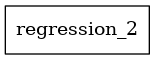

In [109]:
model.summary()
plot_model(model, to_file='../boston_model_1.png', 
           show_shapes=True)

In [110]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,19.717585,3.406959,19.717585,10.340570,2.324011,10.340570,495
496,20.788233,3.393562,20.788233,12.255581,2.607851,12.255581,496
497,19.192160,3.314609,19.192160,12.007459,2.574735,12.007459,497
498,21.346493,3.365456,21.346493,10.213998,2.297573,10.213998,498
499,22.539270,3.417351,22.539270,9.901129,2.293375,9.901129,499


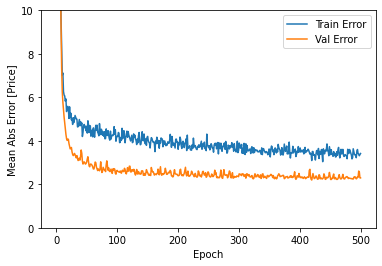

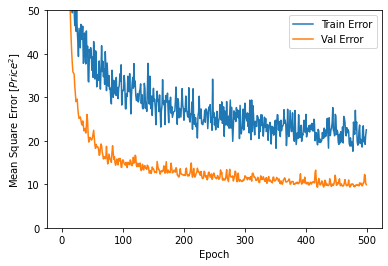

In [111]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Price]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,10])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Price^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,50])
  plt.legend()
  plt.show()


plot_history(history)

In [112]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Price".format(mae))

4/4 - 0s - loss: 6.5072 - mae: 1.9116 - mse: 6.5072
Testing set Mean Abs Error:  1.91 Price


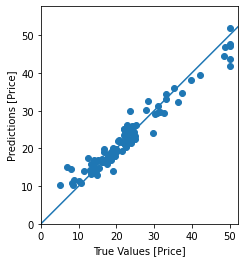

In [113]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

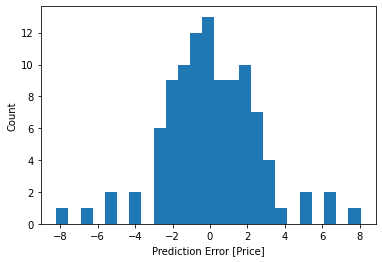

In [114]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Price]")
_ = plt.ylabel("Count")